<a href="https://colab.research.google.com/github/matthewsj17/Spotify-Data-Analysis-DSCI300-Project/blob/Garrett/DSCI300_DataCleaning_SemesterProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook Directives/Requirements

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

***Dataset*** Information (Taken From Kaggle)


**index** = *Unique Index for each track (can be ignored for analysis)*

**track_id** = *Spotify’s unique identifier for the track*

**artists** = *Name of the performing artist(s)*

**album_name** = *Title of the album the track belongs to*

**track_name** = *Title of the track*

**popularity** = *Popularity score on Spotify (0–100 scale)*

**duration_ms** = *Duration of the track in milliseconds*

**explicit** = *Indicates whether the track contains explicit content*

**danceability** = *How suitable the track is for dancing (0.0 to 1.0)*

**energy** = *Intensity and activity level of the track (0.0 to 1.0)*

**key** = *Musical key (0 = C, 1 = C♯/D♭, …, 11 = B)*

**loudness** = *Overall loudness of the track in decibels (dB)*

**mode** = *Modality (major = 1, minor = 0)*

**speechiness** = *Presence of spoken words in the track (0.0 to 1.0)*

**acousticness** = *Confidence measure of whether the track is acoustic (0.0 to 1.0)*

**instrumentalness** = *Predicts whether the track contains no vocals (0.0 to 1.0)*

**liveness** = *Presence of an audience in the recording (0.0 to 1.0)*

**valence** = *Musical positivity conveyed (0.0 = sad, 1.0 = happy)*

**tempo** = *Estimated tempo in beats per minute (BPM)*

**time_signature** = *Time signature of the track (e.g., 4 = 4/4)*

**track_genre** = *Assigned genre label for the track*


## 1) Exploration
- Identify missing values and describe their extent.
- Identify duplicate records.
- Identify inconsistent entries (e.g., “Male” vs. “M”, or date formatting differences).
- Identify potential outliers using at least one method (e.g., boxplots, z-scores, IQR).

## 2) Cleaning
- Apply appropriate methods to handle missing values (e.g., drop, impute, flag).
- Resolve duplicates (drop or merge).
- Fix inconsistencies (standardize formats, unify categories).
- Handle outliers (remove, cap, or explain decision to keep).

### Importing Dataset

In [3]:
spotify_df = pd.read_csv('/content/drive/MyDrive/dsci_300_semster_project/monfaredSpotifyDataset.csv')

In [4]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [5]:
spotify_df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


### Missing Values

In [6]:
# Check for NaN values

spotify_df.isna().sum()



,0
index,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [7]:
# Since there are values, we isolate these to find what rows they're on.

nan_rows_any = spotify_df[spotify_df.isna().any(axis=1)]

nan_rows_any



,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [8]:
# Its only one row, so we can either omit this from the data or try to identify the information from the track_id.

# For ease of use, we'll just omit it since it is one data point.

spotify_df = spotify_df.dropna()
spotify_df.isna().sum()

,0
index,0
track_id,0
artists,0
album_name,0
track_name,0
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


### Duplicate Records (Identified by 'track_id' column, since these should be unique)

In [9]:
dup_counts = spotify_df['track_id'].value_counts()

# show how many appear more than once
duplicates = dup_counts[dup_counts > 1]
duplicates.info()

<class 'pandas.core.series.Series'>
Index: 16641 entries, 6S3JlDAGk3uu3NtZbPnuhS to 0b6YJvYoOLT6aXWru8ckDX
Series name: count
Non-Null Count  Dtype
--------------  -----
16641 non-null  int64
dtypes: int64(1)
memory usage: 260.0+ KB


In [10]:
trackIdDupes = spotify_df[spotify_df['track_id'].duplicated(keep=False)]
trackIdDupes = trackIdDupes.sort_values('track_id')
trackIdDupes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40900 entries, 15028 to 91401
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             40900 non-null  int64  
 1   track_id          40900 non-null  object 
 2   artists           40900 non-null  object 
 3   album_name        40900 non-null  object 
 4   track_name        40900 non-null  object 
 5   popularity        40900 non-null  int64  
 6   duration_ms       40900 non-null  int64  
 7   explicit          40900 non-null  bool   
 8   danceability      40900 non-null  float64
 9   energy            40900 non-null  float64
 10  key               40900 non-null  int64  
 11  loudness          40900 non-null  float64
 12  mode              40900 non-null  int64  
 13  speechiness       40900 non-null  float64
 14  acousticness      40900 non-null  float64
 15  instrumentalness  40900 non-null  float64
 16  liveness          40900 non-null  float64

In [11]:
# It seems as though the rows with duplicated track id contain the same information except for genre.
# We can either omit the track genre's or reconsolidate unpopular genres into larger categories
pd.set_option('display.max_columns', None)
trackIdDupes

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
103211,103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,False,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
85578,85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,False,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
91801,91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,False,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72679,72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
22326,22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,True,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
2004,2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock
3100,3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative


In [12]:
# pd.set_option('display.max_rows', none) # to see all values
spotify_df['track_genre'].value_counts(dropna=False)

# It seems as though the data set contains an 'equal' number of each genre,
# and the duplicates are those which were chosen out of two or more different genre pools
# when the data was being collected.

,count
track_genre,
acoustic,1000
afrobeat,1000
alt-rock,1000
alternative,1000
ambient,1000
...,...
techno,1000
turkish,1000
trip-hop,1000


In [13]:
# Considering lack of experience in this project, removing genre from the data set entirely seems viable,
# that way we can collapse the duplicate columns onto each other.
# This is done at no severe deteriment, since all genres are equally represented anyway.

spotify_df = spotify_df.drop(columns=['track_genre'])

In [14]:
# Now we run our duplicate check again, this time for each column.

spotify_df['track_id'].duplicated().sum()

np.int64(24259)

In [15]:
# Now we drop EXACT duplicate rows.
spotify_df.drop_duplicates(subset='track_id', keep='first', inplace=True)

In [16]:
# Now we check for 'track_id' duplicates once more.
spotify_df['track_id'].duplicated().sum()

np.int64(0)

In [17]:
# Now we have a remaining 89740 rows, that should all be unique.
# This is confirmed by the unique
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             89740 non-null  int64  
 1   track_id          89740 non-null  object 
 2   artists           89740 non-null  object 
 3   album_name        89740 non-null  object 
 4   track_name        89740 non-null  object 
 5   popularity        89740 non-null  int64  
 6   duration_ms       89740 non-null  int64  
 7   explicit          89740 non-null  bool   
 8   danceability      89740 non-null  float64
 9   energy            89740 non-null  float64
 10  key               89740 non-null  int64  
 11  loudness          89740 non-null  float64
 12  mode              89740 non-null  int64  
 13  speechiness       89740 non-null  float64
 14  acousticness      89740 non-null  float64
 15  instrumentalness  89740 non-null  float64
 16  liveness          89740 non-null  float64
 1

In [18]:
# Identify Inconsistent Formatting
pd.set_option('display.max_rows', 20)
# Create a summary table of unique values for each column
unique_summary = pd.DataFrame({
    'Column': spotify_df.columns,
    'Num Unique Values': [spotify_df[col].nunique() for col in spotify_df],
    'Unique Values (sample)': [spotify_df[col].unique()[:10] for col in spotify_df.columns]  # show first 10 uniques
})

# Display the table
unique_summary

,Column,Num Unique Values,Unique Values (sample)
0,index,89740,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]"
1,track_id,89740,"[5SuOikwiRyPMVoIQDJUgSV, 4qPNDBW1i3p13qLCt0Ki3..."
2,artists,31437,"[Gen Hoshino, Ben Woodward, Ingrid Michaelson;..."
3,album_name,46589,"[Comedy, Ghost (Acoustic), To Begin Again, Cra..."
4,track_name,73608,"[Comedy, Ghost - Acoustic, To Begin Again, Can..."
5,popularity,101,"[73, 55, 57, 71, 82, 58, 74, 80, 56, 69]"
6,duration_ms,50696,"[230666, 149610, 210826, 201933, 198853, 21424..."
7,explicit,2,"[False, True]"
8,danceability,1174,"[0.676, 0.42, 0.438, 0.266, 0.618, 0.688, 0.40..."
9,energy,2083,"[0.461, 0.166, 0.359, 0.0596, 0.443, 0.481, 0...."


In [19]:
# We check track_name for duplicates in the same way, as it is the only suspiciously low variable for the data.
trackDup_counts = spotify_df['track_name'].value_counts()
trackDup_counts
# # show how many appear more than once
duplicates = trackDup_counts[trackDup_counts > 1]
duplicates.info()


<class 'pandas.core.series.Series'>
Index: 7991 entries, Rockin' Around The Christmas Tree to Carro Bicho
Series name: count
Non-Null Count  Dtype
--------------  -----
7991 non-null   int64
dtypes: int64(1)
memory usage: 124.9+ KB


In [20]:
# 7991 duplicates recieved, which COULD just be covers.
trackNameDupes = spotify_df[spotify_df['track_name'].duplicated(keep=False)]
trackNameDupes = trackNameDupes.sort_values('track_name')
trackNameDupes

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
111402,111402,03XMXPAE2Yx6HeqCpAPL5o,Kid Koala,Baby Driver (Music from the Motion Picture),"""Was He Slow?"" - Music From The Motion Picture...",25,106880,False,0.754,0.7190,10,-5.806,0,0.3710,0.3730,0.259,0.1200,0.674,175.990,4
111315,111315,1Ffxfl1vuEDc0xBVPIQ50s,Kid Koala,"""Was He Slow?"" (Music From The Motion Picture ...","""Was He Slow?"" - Music From The Motion Picture...",37,106880,False,0.754,0.7190,10,-5.806,0,0.3710,0.3730,0.259,0.1200,0.674,175.990,4
45890,45890,1qUdmikV7AoqFaOBPQg3ck,Baden Powell,Three Originals: Tristeza on Guitar / Poema on...,'Round Midnight,22,332613,False,0.392,0.0859,3,-20.668,0,0.0436,0.9660,0.870,0.1040,0.134,93.584,4
79935,79935,1wl5b2lw3YagQtZiYZbQWP,Thelonious Monk,"Genius Of Modern Music (Vol.1, Expanded Edition)",'Round Midnight,54,193840,False,0.542,0.3200,8,-9.975,1,0.0387,0.9070,0.649,0.0609,0.206,116.648,4
19097,19097,2JerUEDYblFmPzZjLs4a1z,Cody Johnson,Single Saturday Night - Country Songs,'Til You Can't,0,224213,False,0.501,0.8150,1,-4.865,1,0.0436,0.0513,0.000,0.1060,0.460,160.087,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61761,61761,2NUEMsI2aRBmkCr9samAoP,Keyakizaka46,風に吹かれても,風に吹かれても,19,221506,False,0.706,0.9160,4,-2.609,0,0.1150,0.2910,0.000,0.3280,0.886,125.927,4
61187,61187,5mUl6GfKv2cGnnF7KsZTup,Seiko Matsuda,風立ちぬ,風立ちぬ(SEIKO STORY〜80's HITS COLLECTION〜),28,278400,False,0.580,0.7250,10,-4.996,1,0.0289,0.4790,0.000,0.3860,0.629,131.332,4
61079,61079,5xPqG3KrBkIGarQQCDKfxC,Seiko Matsuda,風立ちぬ,風立ちぬ(SEIKO STORY〜80's HITS COLLECTION〜),31,275746,False,0.588,0.7100,10,-6.249,1,0.0291,0.4120,0.000,0.3790,0.646,131.537,4
62807,62807,5v1dhqe9vgvp87eyd27hkb,yama,the meaning of life,麻痺,58,198040,False,0.309,0.9410,0,-3.558,0,0.0763,0.0587,0.000,0.4350,0.704,100.020,4


In [21]:
# It seems as though these are a mix of covers, as well as different releases by the artist.

# Possible Fixes
# - Ignore
# - If the artist is same, only take the more popular version since other variables may be different

# To consolidate data and prevent excess, taking the more popular version can be done.

new_df = (
    spotify_df
    .sort_values('popularity', ascending=False)
    .drop_duplicates(subset=['track_name', 'artists'], keep='first')
    # .reset_index(drop=True)
)

new_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 81343 entries, 20001 to 49021
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             81343 non-null  int64  
 1   track_id          81343 non-null  object 
 2   artists           81343 non-null  object 
 3   album_name        81343 non-null  object 
 4   track_name        81343 non-null  object 
 5   popularity        81343 non-null  int64  
 6   duration_ms       81343 non-null  int64  
 7   explicit          81343 non-null  bool   
 8   danceability      81343 non-null  float64
 9   energy            81343 non-null  float64
 10  key               81343 non-null  int64  
 11  loudness          81343 non-null  float64
 12  mode              81343 non-null  int64  
 13  speechiness       81343 non-null  float64
 14  acousticness      81343 non-null  float64
 15  instrumentalness  81343 non-null  float64
 16  liveness          81343 non-null  float64

In [22]:
# As seen below, we successfully removed the duplicated songs by the same artist while keeping covers of the song.

In [23]:
test1_df = new_df[new_df['track_name'] == "'Round Midnight"]
test1_df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
79935,79935,1wl5b2lw3YagQtZiYZbQWP,Thelonious Monk,"Genius Of Modern Music (Vol.1, Expanded Edition)",'Round Midnight,54,193840,False,0.542,0.3200,8,-9.975,1,0.0387,0.907,0.649,0.0609,0.206,116.648,4
45890,45890,1qUdmikV7AoqFaOBPQg3ck,Baden Powell,Three Originals: Tristeza on Guitar / Poema on...,'Round Midnight,22,332613,False,0.392,0.0859,3,-20.668,0,0.0436,0.966,0.870,0.1040,0.134,93.584,4


In [24]:
test2_df = new_df[new_df['track_name'] == '麻痺']
test2_df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
62807,62807,5v1dhqe9vgvp87eyd27hkb,yama,the meaning of life,麻痺,58,198040,False,0.309,0.941,0,-3.558,0,0.0763,0.0587,0.0,0.435,0.704,100.02,4


In [25]:
# Throughout the rest of the code, the dataframe used will be:

spotifyClean = new_df.sort_values('index', ascending=True)
spotifyClean

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [26]:
# In order for the code to make the most sense, we reset the index values of spotifyClean_df to align properly.
spotifyClean.drop(columns=['index'], inplace=True)
spotifyClean

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [27]:
spotifyClean = spotifyClean.reset_index(names='level_0')
spotifyClean.drop(columns=['level_0'], inplace=True)
spotifyClean.reset_index(names='index', inplace=True)
spotifyClean

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,81338,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
81339,81339,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
81340,81340,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
81341,81341,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


### Inconsistent Entries

In [28]:
# In practice inconsistent entries get found during further processes. As of now we are good to go says Kabernathy!

### Outlier Detection

In [29]:
spotify_contcols = ['popularity','duration_ms','danceability','energy','key',
                   'loudness','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','time_signature']
spotifyCont_df = spotifyClean[spotify_contcols]

In [30]:
# Z Scores

from scipy.stats import zscore

# Calculate z-scores for each numeric column
z_scores = spotifyCont_df.apply(zscore)

# Set a threshold (common: 3)
threshold = 3
outliers_z = (abs(z_scores) > threshold)

# Get rows with any outlier
outlier_rows_z = spotifyClean[outliers_z.any(axis=1)]
outlier_rows_z

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
85,85,08OjvLnGR3M0HUhcePeMNO,Andrew Foy;Renee Foy,death bed (coffee for your head),death bed (coffee for your head),47,112008,False,0.565,0.0392,1,-28.276,1,0.0450,0.835,0.183000,0.1170,0.6010,125.399,4
86,86,65VhbQdqvozUntjnlFkFbZ,Kina Grannis,You Are My Sunshine,You Are My Sunshine,60,123609,False,0.664,0.0755,10,-19.836,1,0.0389,0.910,0.000000,0.1640,0.5750,80.004,1
149,149,4bXoVtbp6fN8FaSQvGQB41,Chord Overstreet,Tree House Tapes,Tortured Soul,53,246613,False,0.550,0.4990,4,-9.502,1,0.0338,0.472,0.000002,0.0798,0.1440,86.966,1
207,207,6OCsvPU6P84wJ0erggCRv4,Albert King,pov: you have a holly jolly christmas,Christmas Comes But Once A Year,0,272640,False,0.687,0.4940,1,-9.421,1,0.0505,0.324,0.000055,0.0867,0.6210,93.269,1
242,242,0njuNwIyB3DoBHC0SFUkOr,Andrew Foy;Renee Foy,You Broke Me First,You Broke Me First,39,128798,True,0.734,0.0423,4,-24.831,1,0.0583,0.916,0.000000,0.1080,0.1400,123.905,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81302,81302,6NLvZYW0COmwDboKdLhYIi,Michael W. Smith,Worship Again,There Is None Like You,40,129933,False,0.340,0.3200,7,-15.807,1,0.0495,0.906,0.000000,0.9760,0.5750,66.443,4
81309,81309,4DrOtvGcJRQ71S0TPwGMHW,Paz Interior,Ambient Attention,"Ambient Attention, Pt. 14",21,125580,False,0.210,0.0712,9,-26.100,1,0.0518,0.501,0.922000,0.1110,0.0387,62.201,3
81315,81315,4aLBgBxa1ajNoWD3OSDay6,Ondas Delta,Abre Tu Mente: Música con Sonidos Binaurales y...,Ondas Cerebrales Delta,21,359003,False,0.312,0.0330,9,-25.894,1,0.0307,0.853,0.851000,0.1140,0.0639,79.655,4
81316,81316,6xZuzUxNn5AGIPQ2FvXXLP,Mc_team,Frecuencias Curativas Solfeggio 528 Hz,528Hz La frecuencia del amor,21,170387,False,0.170,0.0520,2,-28.693,1,0.0374,0.875,0.904000,0.1290,0.0475,114.573,4


In [31]:
z_outlier_cols = [col for col in spotifyCont_df.columns if outliers_z[col].any()]

print("Z-score outlier columns:", z_outlier_cols)

Z-score outlier columns: ['popularity', 'duration_ms', 'danceability', 'loudness', 'speechiness', 'liveness', 'tempo', 'time_signature']


In [32]:
# Tukey's Fences

Q1 = spotifyCont_df.quantile(0.25, numeric_only=True)
Q3 = spotifyCont_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Tukey's fences: 1.5*IQR for mild, 3*IQR for extreme outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_tukey = ((spotifyCont_df < lower_bound) | (spotifyCont_df > upper_bound))
outlier_rows_tukey = spotifyCont_df[outliers_tukey.any(axis=1)]

In [33]:
outlier_rows_tukey

,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3,71,201933,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
6,74,229400,0.407,0.1470,2,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3
11,69,240165,0.483,0.3030,4,-10.058,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,3
15,58,244986,0.489,0.5610,4,-7.933,0.0274,0.2000,0.000046,0.1790,0.2380,83.457,3
23,0,234186,0.593,0.4550,6,-8.192,0.0388,0.3660,0.000000,0.0914,0.5640,202.019,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81334,22,369049,0.579,0.2450,4,-16.357,0.0384,0.9700,0.924000,0.1010,0.3020,112.011,3
81336,39,256026,0.505,0.6870,10,-4.375,0.0287,0.0841,0.000000,0.1880,0.3820,104.083,3
81337,22,305454,0.331,0.1710,1,-15.668,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3
81338,21,384999,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5


In [34]:
print('Popularity Described')
print(outlier_rows_tukey['popularity'].describe())
print()

print('Number of Popularity values underneath 20')
print(outlier_rows_tukey['popularity'][outlier_rows_tukey['popularity'] < 20].count())


print('Number of Popularity values underneath 30')
print(outlier_rows_tukey['popularity'][outlier_rows_tukey['popularity'] < 30].count())

# We can cut a LARGE majority of outliers just by raising the minimum popularity required to be considered.
# As for now, we will cut the bottom 20% of songs, since these aren't getting pushed by the spotify algorithm anyway.

Popularity Described
count    36709.000000
mean        31.648261
std         18.689871
min          0.000000
25%         18.000000
50%         30.000000
75%         46.000000
max        100.000000
Name: popularity, dtype: float64

Number of Popularity values underneath 20
10018
Number of Popularity values underneath 30
18315


Isolating top 80% of songs. That way only actually 'popular' ones are in the data, since alot of the outliers are non-popular songs.

In [35]:
spotifyPopular_df = spotifyClean[spotifyClean['popularity'] > 20]
spotifyPopular_df

,index,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,81338,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
81339,81339,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
81340,81340,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
81341,81341,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [36]:
# Reset index as done previously.

# spotifyPopular_df.drop(columns=['index'], inplace=True)
spotifyPopular_df.reset_index(inplace=True)
spotifyPopular_df.drop(columns=['level_0'], inplace=True)
spotifyPopular_df.drop(columns=['index'], inplace=True)
spotifyPopular_df

/tmp/ipython-input-1932910834.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyPopular_df.drop(columns=['level_0'], inplace=True)
/tmp/ipython-input-1932910834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyPopular_df.drop(columns=['index'], inplace=True)


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62387,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
62388,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
62389,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
62390,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


## 3) Preprocessing
- Feature Encoding
- Scaling

Reasoning Behind Encoding

- Ease of Understanding
  - Creation of 'key_name' from 'key' (by having Letter names for the musical keys, it allows analysis to be quicker and more effcient.)
  - Creation of 'mode_name' from 'mode' (same as above)
  - Creation of 'duration_s' from 'duration_ms' (same as above, seconds makes more sense on the human timescale than milliseconds.)

- Future Math / Analysis
  - Creation of 'explicit_labelEncoded' from 'explicit' (can calculate things like mean, std, etc with the values being numerical)
  - Creation of 'duration_s' from 'duration_ms' (seconds makes more sense on the human timescale than milliseconds)


In [37]:
# Adding 'key_name' column.

spotifyPopular_df['key_name'] = spotifyPopular_df['key'].map({
    0: 'C',
    1: 'C♯/D♭',
    2: 'D',
    3: 'D♯/E♭',
    4: 'E',
    5: 'F',
    6: 'F♯/G♭',
    7: 'G',
    8: 'G♯/A♭',
    9: 'A',
    10: 'A♯/B♭',
    11: 'B'
})


/tmp/ipython-input-409390557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyPopular_df['key_name'] = spotifyPopular_df['key'].map({


In [38]:
# Adding 'mode_name' Column

spotifyPopular_df['mode_name'] = spotifyPopular_df['mode'].map({
    0: 'Minor',
    1: 'Major'
})

/tmp/ipython-input-2948433556.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyPopular_df['mode_name'] = spotifyPopular_df['mode'].map({


In [39]:
spotifyPopular_df['key_name'].value_counts()

,count
key_name,
G,7393
C,7200
D,6780
A,6441
C♯/D♭,5662
E,5156
F,5025
B,4980
F♯/G♭,4181


In [40]:
# Encoding Explicit as 0,1 to calculate mean and such.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

spotifyPopular_df['explicit_labelEncoded'] = le.fit_transform(spotifyPopular_df['explicit'])


/tmp/ipython-input-764052387.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyPopular_df['explicit_labelEncoded'] = le.fit_transform(spotifyPopular_df['explicit'])


In [41]:
spotifyPopular_df['explicit_labelEncoded'].value_counts()

# 0 = False
# 1 = True

,count
explicit_labelEncoded,
0,56606
1,5786


In [42]:
spotifyPopular_df['duration_s'] = spotifyPopular_df['duration_ms'] / 1000
spotifyPopular_df['duration_s'] = spotifyPopular_df['duration_s'].astype(int)

spotifyPopular_df['duration_s']

/tmp/ipython-input-2554242553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyPopular_df['duration_s'] = spotifyPopular_df['duration_ms'] / 1000
/tmp/ipython-input-2554242553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotifyPopular_df['duration_s'] = spotifyPopular_df['duration_s'].astype(int)


,duration_s
0,230
1,149
2,210
3,201
4,198
...,...
62387,384
62388,385
62389,271
62390,283


In [43]:
pd.set_option('display.max_columns', None)
spotifyPopular_df.head(15)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,explicit_labelEncoded,duration_s
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,C♯/D♭,Minor,0,230
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,C♯/D♭,Major,0,149
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,C,Major,0,210
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,C,Major,0,201
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,D,Major,0,198
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,F♯/G♭,Major,0,214
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,D,Major,0,229
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,B,Major,0,242
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,C,Major,0,189
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,C♯/D♭,Major,0,205


In [44]:
spotify_contcols = ['popularity','duration_s','danceability','energy','key',
                   'loudness','speechiness','acousticness','instrumentalness',
                   'liveness','valence','tempo','time_signature']
spotifyPopCont_df = spotifyPopular_df[spotify_contcols]

In [45]:
# Running outliers on new data

# Z Scores

from scipy.stats import zscore

# Calculate z-scores for each numeric column
z_scores = spotifyPopCont_df.apply(zscore)

# Set a threshold (common: 3)
threshold = 3
outliers_z = (abs(z_scores) > threshold)

# Get rows with any outlier
outlier_rows_z = spotifyPopular_df[outliers_z.any(axis=1)]
outlier_rows_z

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,explicit_labelEncoded,duration_s
68,08OjvLnGR3M0HUhcePeMNO,Andrew Foy;Renee Foy,death bed (coffee for your head),death bed (coffee for your head),47,112008,False,0.565,0.0392,1,-28.276,1,0.0450,0.835,0.183000,0.1170,0.6010,125.399,4,C♯/D♭,Major,0,112
69,65VhbQdqvozUntjnlFkFbZ,Kina Grannis,You Are My Sunshine,You Are My Sunshine,60,123609,False,0.664,0.0755,10,-19.836,1,0.0389,0.910,0.000000,0.1640,0.5750,80.004,1,A♯/B♭,Major,0,123
125,4bXoVtbp6fN8FaSQvGQB41,Chord Overstreet,Tree House Tapes,Tortured Soul,53,246613,False,0.550,0.4990,4,-9.502,1,0.0338,0.472,0.000002,0.0798,0.1440,86.966,1,E,Major,0,246
213,0njuNwIyB3DoBHC0SFUkOr,Andrew Foy;Renee Foy,You Broke Me First,You Broke Me First,39,128798,True,0.734,0.0423,4,-24.831,1,0.0583,0.916,0.000000,0.1080,0.1400,123.905,4,E,Major,1,128
215,2Dz5WpEWA0vhnMmEPYiZ2y,Parachute,Losing Sleep,She Is Love,60,146066,False,0.629,0.1740,6,-9.697,1,0.1410,0.616,0.000000,0.1180,0.3050,134.295,1,F♯/G♭,Major,0,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62351,6NLvZYW0COmwDboKdLhYIi,Michael W. Smith,Worship Again,There Is None Like You,40,129933,False,0.340,0.3200,7,-15.807,1,0.0495,0.906,0.000000,0.9760,0.5750,66.443,4,G,Major,0,129
62358,4DrOtvGcJRQ71S0TPwGMHW,Paz Interior,Ambient Attention,"Ambient Attention, Pt. 14",21,125580,False,0.210,0.0712,9,-26.100,1,0.0518,0.501,0.922000,0.1110,0.0387,62.201,3,A,Major,0,125
62364,4aLBgBxa1ajNoWD3OSDay6,Ondas Delta,Abre Tu Mente: Música con Sonidos Binaurales y...,Ondas Cerebrales Delta,21,359003,False,0.312,0.0330,9,-25.894,1,0.0307,0.853,0.851000,0.1140,0.0639,79.655,4,A,Major,0,359
62365,6xZuzUxNn5AGIPQ2FvXXLP,Mc_team,Frecuencias Curativas Solfeggio 528 Hz,528Hz La frecuencia del amor,21,170387,False,0.170,0.0520,2,-28.693,1,0.0374,0.875,0.904000,0.1290,0.0475,114.573,4,D,Major,0,170


In [46]:
z_outlier_cols = [col for col in spotifyPopCont_df.columns if outliers_z[col].any()]

print("Z-score outlier columns:", z_outlier_cols)

Z-score outlier columns: ['popularity', 'duration_s', 'danceability', 'loudness', 'speechiness', 'liveness', 'tempo', 'time_signature']


In [47]:
# Tukey's Fences

Q1 = spotifyPopCont_df.quantile(0.25, numeric_only=True)
Q3 = spotifyPopCont_df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

# Tukey's fences: 1.5*IQR for mild, 3*IQR for extreme outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_tukey = ((spotifyPopCont_df < lower_bound) | (spotifyPopCont_df > upper_bound))
outlier_rows_tukey = spotifyPopCont_df[outliers_tukey.any(axis=1)]

In [48]:
outlier_rows_tukey

,popularity,duration_s,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
3,71,201,0.266,0.0596,0,-18.515,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
6,74,229,0.407,0.1470,2,-8.822,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3
11,69,240,0.483,0.3030,4,-10.058,0.0429,0.6940,0.000000,0.1150,0.1390,133.406,3
15,58,244,0.489,0.5610,4,-7.933,0.0274,0.2000,0.000046,0.1790,0.2380,83.457,3
16,56,129,0.706,0.1120,2,-18.098,0.0391,0.8270,0.000004,0.1250,0.4140,110.154,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62383,22,369,0.579,0.2450,4,-16.357,0.0384,0.9700,0.924000,0.1010,0.3020,112.011,3
62385,39,256,0.505,0.6870,10,-4.375,0.0287,0.0841,0.000000,0.1880,0.3820,104.083,3
62386,22,305,0.331,0.1710,1,-15.668,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3
62387,21,384,0.172,0.2350,5,-16.393,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5


Since Tukey's fences gives more outliers than Z scores, it could be said that Z-score offers, 'true' outliers, since the large amount of variables leads to so many rows being considered outliers.

## 4) Summary

We found a lot of issues with the presence of duplicates in the data. Since the data was gathered from spotify's api, and attempted to be equally spread throughout genre, some songs ended up being included multiple times with different classified genre. In the case of songs on different albums, variables has some variance. In this case, as long as the track name and artist were the same, we took the version of the song with the highest popularity score in order to make our data less cluttered.

Additionally, we made the choice to cut a large portion of the data since it wasn't considered popular (anything 20 and under on the popularity score). This was because of two reasons. First, to decrease the number of outliers in our data. Secondly, since Spotify's algorithm is known to not promote songs with popularity scores beneath 20.

The data in its current state is cleaned, assuming nothing snuck under the radar of the commands utilized.

In regards to the scaling/standardization present, the dataset seemed to not have a need to further scaling/standardize any of the variables. Loudness was kept as is since it is a measure in db, and any alternations would take meaning away.

# EDA

## Part I.
Perform an exploratory analysis of your dataset to identify key characteristics and trends. Your analysis should include:

- Data Overview

  - Description of your dataset (source, context, size, number of features).
    Summary statistics for numerical and categorical variables.
    Data types and any preprocessing steps already completed.


- Exploratory Visualizations

  - At least five meaningful visualizations (e.g., histograms, box plots,   scatter plots, bar charts). Use Plotly for interactive plots where possible.Include clear titles, labels, and legends. Provide interpretation for each visualization (what does it reveal about the data?).


- Insights Summary

  - Identify patterns, relationships, or anomalies. Discuss potential factors or questions for deeper analysis.  

#### Data Overview

In [49]:
spotifyPopular_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,explicit_labelEncoded,duration_s
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,C♯/D♭,Minor,0,230
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,C♯/D♭,Major,0,149
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,C,Major,0,210
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,C,Major,0,201
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,D,Major,0,198


In [52]:
spotifyPopular_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62392 entries, 0 to 62391
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   track_id               62392 non-null  object 
 1   artists                62392 non-null  object 
 2   album_name             62392 non-null  object 
 3   track_name             62392 non-null  object 
 4   popularity             62392 non-null  int64  
 5   duration_ms            62392 non-null  int64  
 6   explicit               62392 non-null  bool   
 7   danceability           62392 non-null  float64
 8   energy                 62392 non-null  float64
 9   key                    62392 non-null  int64  
 10  loudness               62392 non-null  float64
 11  mode                   62392 non-null  int64  
 12  speechiness            62392 non-null  float64
 13  acousticness           62392 non-null  float64
 14  instrumentalness       62392 non-null  float64
 15  li

Dataset is a 62391x23 matrix of 18 features. Four of these columns are represented with specific encodings for further analysis after the initial preprocessing, this totals to 23 columns of features. These columns are key_name (actual key of song, rather than numeric value), mode_name (similar to key_name, replaces numeric functionality), explicit_labelEncoded (dummy values, rather than boolean), and duration_s (used for comprehensiveness, rather than use of milliseconds to represent track duration).

In [53]:
spotifyPopular_df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit_labelEncoded,duration_s
count,62392.000000,6.239200e+04,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000,62392.000000
mean,42.887117,2.279676e+05,0.562655,0.637476,5.282360,-8.352685,0.639361,0.088076,0.330958,0.144974,0.224981,0.471446,122.130022,3.902600,0.092736,227.492948
std,14.924351,1.019559e+05,0.169333,0.250619,3.552708,5.150418,0.480190,0.119471,0.329556,0.301339,0.204922,0.259837,30.233461,0.445434,0.290065,101.955641
min,21.000000,3.008000e+04,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,30.000000,1.752400e+05,0.456000,0.468000,2.000000,-10.037000,0.000000,0.035400,0.022300,0.000000,0.099500,0.256000,99.003750,4.000000,0.000000,175.000000
50%,42.000000,2.146660e+05,0.574000,0.676000,5.000000,-7.105000,1.000000,0.047800,0.212000,0.000027,0.134000,0.458000,122.019500,4.000000,0.000000,214.000000
75%,54.000000,2.626238e+05,0.686000,0.849000,8.000000,-5.089000,1.000000,0.083900,0.615000,0.026500,0.288000,0.680000,141.091000,4.000000,0.000000,262.000000
max,100.000000,5.237295e+06,0.982000,1.000000,11.000000,2.574000,1.000000,0.965000,0.996000,1.000000,1.000000,0.994000,243.372000,5.000000,1.000000,5237.000000


In [57]:
spotifyPopular_df[['key','key_name']].head(20)

,key,key_name
0,1,C♯/D♭
1,1,C♯/D♭
2,0,C
3,0,C
4,2,D
5,6,F♯/G♭
6,2,D
7,11,B
8,0,C
9,1,C♯/D♭


Using the convention of the romanized key naming is primarily used for referencing the actual numerical values of a song's key. Though, further analysis will provide evidence to the efficacy of using this feature as an actual descriptor, since a mean value of 0.63 for all songs doesn't provide a meaningful interpretation of the key across the data as it stands.

In [61]:
spotifyPopular_df[['key','key_name']].mode()

,key,key_name
0,7,G


Using the mode, we can see that Gmaj seems to be the most popular key for the given data.

#### Exploratory Visualizations

Using slightly intermidiate domain knowledge of elements assumed to provide a gain in popularity, we use the columns in the following code block to view the distribution of the data in each.

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
spotifyPopular_df.keys()

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'explicit_labelEncoded', 'duration_s'],
      dtype='object')

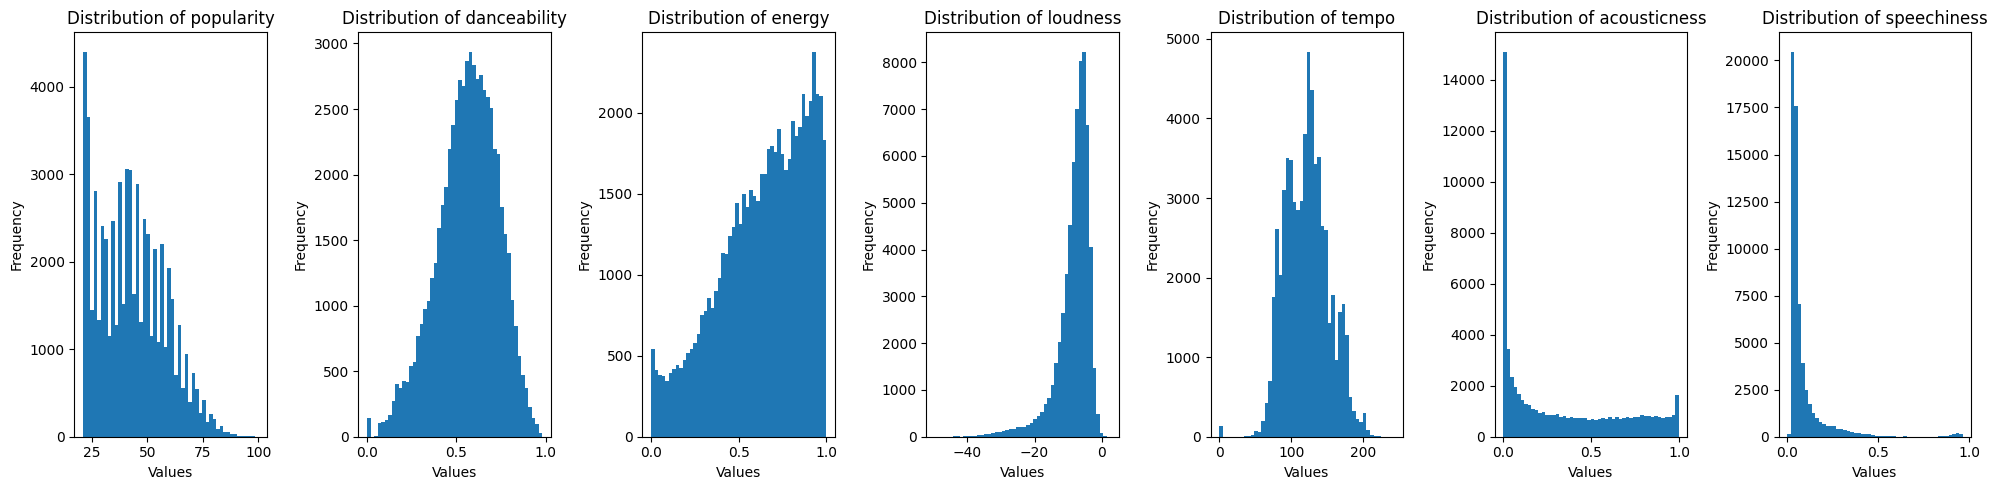

In [78]:
# put column names of the ones we may want to analyze, then show hists
num_list = list(range(7))
hist_list = ['popularity','danceability','energy','loudness','tempo','acousticness','speechiness']
fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20,5))
# for each col name, set histograms
for idx, col_name in zip(num_list, hist_list):
  axes[idx].hist(spotifyPopular_df[col_name], bins=50)
  axes[idx].set_title(f'Distribution of {col_name}')
for ax in axes:
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

We can see that the columns of tempo and danceability are normally distributed. This seems reasonable as tempo is relatively consistent in music production (usually 80 to 160 for most genres), and danceability is a seemingly subjective valuation in my opinion, but most songs should be danceable I would think.

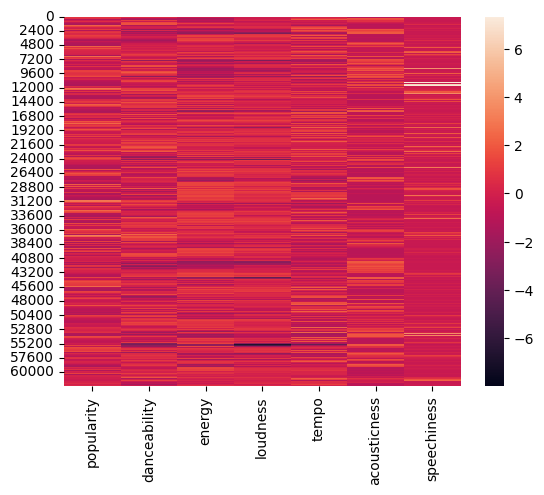

In [89]:
analytical_df = spotifyPopular_df.copy()
analytical_df = analytical_df[[col for col in hist_list]]
# since very high values, normalize to see typical heatmap styling
#heatmap = sns.heatmap(analytical_df)
heatmap = sns.heatmap((analytical_df-analytical_df.mean())/analytical_df.std())

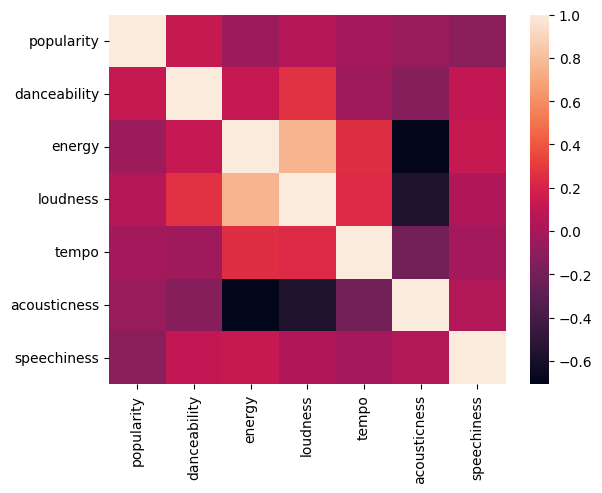

In [90]:
corr_map = sns.heatmap(analytical_df.corr())

#### Insights Summary
After looking at the various graphs, a few different insights and interpretations may be possible. The first is that it seems that an increase in the loudness and energy of a track seem to increase the popularity of a track. This seems reasonable since most commercial tracks tending to the "loudness" wars tend to be as loud as possible, while still maintaining quality. As far as the energy of a track, it follows that because of similar factors to loudness, higher energy tracks tend to be played in more places due to the upbeat nature of those tracks (i.e. parties, clubs, certain fashion stores).

Surprisingly, tempo and danceablity are not as highly correlated as initally suspected. However, of note is that interestingly energy has a slightly more negative correlation between the energy and speechiness of a song, where danceability and loudness have more of a positive correlation in regard to the popularity of a track.

## Part II.
- Develop an interactive dashboard that communicates the most important findings from your EDA.

- Your dashboard should:

    - Contain at least 3 interactive elements (e.g., dropdowns, sliders, hover tooltips, filters).
    - Include multiple plots or summary components (e.g., counts, averages, comparisons).
    - Be well-organized with a clear, intuitive layout. Use consistent color schemes and labeling.

In [91]:
# install ploty and dash for jupyter
!pip install plotly dash dash-bootstrap-components jupyter-dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 94.7 MB/s eta 0:00:00


In [92]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc, html, Input, Output
import dash_bootstrap_components as dbc

In [93]:
app = JupyterDash(__name__)

/usr/local/lib/python3.12/dist-packages/dash/dash.py:634: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [ ]:
# for ease of app integration, specify elements to add here


In [101]:
app.layout = html.Div([html.H1('Popular Spotify Songs Dashboard'),
                       dcc.Tabs([
                           dcc.Tab(label='Correlation Heatmap of Analytical Column', children=[
                               dcc.Graph(id='corrmap', figure = px.imshow(analytical_df.corr(),text_auto=True,color_continuous_scale='RdBu_r',title='Correlation Heatmap'))]),
                           dcc.Tab(label='tempo histogram', children=[
                               dcc.Graph(id='tempo', figure=px.histogram(analytical_df['tempo'],x='tempo',nbins=50,title='Distribution of Tempo'))]),
                           dcc.Tab(label='loudness histogram', children=[
                               dcc.Graph(id='loud', figure=px.histogram(analytical_df['loudness'],x='loudness',nbins=50,title='Distribution of Loudness'))])
                       ])
                       ])

In [102]:
app.run(mode='internal')

<IPython.core.display.Javascript object>

#Part III.
- Include a brief written summary (1-2 paragraphs) at the end of your notebook or in a separate Markdown cell:

  - Describe the purpose of the dataset and key findings from your EDA. Summarize the main insights shown in your dashboard. Reflect on what you learned and any limitations or next steps.

The dataset itself is being used in our group to determine the elements that make a song popular, whether it be commercial, or otherwise. Some key findings were the different distribution of the columns, as well as the different correlations between each predictor on the response of popularity. Using the above process, we may be able to further analyze how exactly these elements tie together to bring a cohesive story to our project. Some next steps nonetheless are to further work with the group to determine the best course of action with the analyses of everyone, so that we come to a meaningful conclusion to the data we're working with.